In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def perceptron(x, y, lr=0.01, iters=20, init_w=None):
    w = init_w
    if w is None:
        w = np.random.rand(x.shape[1] + 1) * 0.01
    x = np.hstack((np.ones((x.shape[0],1)),x))
    accuracy = 0
    for i in range(iters):
        predic = (x.dot(w) > 0).astype(int)
        w += lr * ((y-predic).dot(x))
        accuracy = (predic == y).mean()
    return[w, accuracy]

In [46]:
binary_x = np.array(
    [
        [0,0],
        [1,0],
        [0,1],
        [1,1]
    ], dtype=float
)

and_y = np.array([0,0,0,1])
or_y = np.array([0,1,1,1])
xor_y = np.array([0,1,1,0])

and_w, and_accuracy = perceptron(binary_x, and_y)
or_w, or_accuracy = perceptron(binary_x, or_y)
xor_w, xor_accuracy = perceptron(binary_x, xor_y)

print("AND accuracy", and_accuracy)
print("OR accuracy", or_accuracy)
print("XOR accuracy", xor_accuracy)

AND accuracy 1.0
OR accuracy 1.0
XOR accuracy 0.5


In [47]:
data = np.genfromtxt("bogus_student_data.txt", names=True)
data_x = np.stack((data["exercise_points"], data["exam_points"])).T
data_y = (data["grades"] > 2).astype(int)

w1, accuracy1 = perceptron(data_x, data_y, iters=100)
w2, accuracy2 = perceptron(data_x, data_y, lr=0.00001, iters=1000)
w3, accuracy3 = perceptron(data_x, data_y, lr=0.00001, iters=10000, init_w=np.array([-50.0, 0.0, 0.0]))
print("W1 Accuracy", accuracy1)
print("W2 Accuracy", accuracy2)
print("W3 Accuracy", accuracy3)

W1 Accuracy 0.7395
W2 Accuracy 0.7955
W3 Accuracy 1.0


In [48]:
def plot_perceptron(w, minx=0, maxx=20):
    x_range = np.linspace(minx, maxx, 100)
    y = (w[0] + w[1]*x_range)/(-w[2])
    plt.plot(x_range, y)

w0 + w1x1 + w2x2 = 0
w2x2 = -(w0- w1x1)
x2 = (-w0 + w1x1) / w2
x2 = (w0 + w1x1) /(-w2)

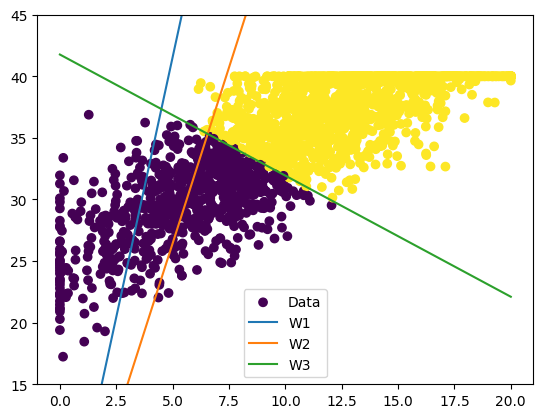

In [55]:
plt.figure()
plt.scatter(data_x[:,0], data_x[:,1], c=data_y)
plt.ylim(15,45)
plot_perceptron(w1)
plot_perceptron(w2)
plot_perceptron(w3)
plt.legend(["Data", "W1", "W2", "W3"])
plt.show()